# **Implémentation de L'algorithme CLOSE**
ce travaille a été réalisé par:


1.   LABCHRI Amayas
2.   KOULAL Yidhir Aghiles



#Introduction
Dans ce notebook , nous allons expliquer notre approche afin d'implémenter l'algorithme Close dans le but d'une analyse des ventes.


De nombreuses entreprises commerciales accumulent d'importantes quantités de données lors de leurs opérations quotidiennes, ainsi beaucoup de magasins collectent énormément de données sur les achats des clients via les tickets de caisse, pour mieux connaitre les comportements d'achat des consommateurs.


 Aujourd'hui grace a la technologie, on peut facilement récolter ses données grace à l'historique des transactions.








#ALgorithme CLOSE :      
L'algorithme CLOSE propose par Pasquier et al. est le premier algorithme permettant l'extraction des itemsets fermes frequents.

La génération des motifs fréquents est une tâche compliquée, car le nombre de
motifs fréquents peut exploser lorsque le nombre de motifs initial est important. Pour
réduire cette complexité, l’algorithme CLOSE génère les motifs fréquents fermés, ils se basent sur la propriété de Galois. L’ensemble des motifs fréquents peut être généré directement à partir de l’ensemble des motifs fréquents fermés.


L’algorithme CLOSE parcourt l’ensemble des générateurs des motifs fermés
fréquents par niveaux. À l’étape k = 1, l’ensemble des 1-générateurs est initialisé aux 1-itemsets. À chaque itération, l’algorithme considère un ensemble de k-itemsets
générateurs. Il construit un ensemble de motifs fermés candidats qui sont les fermetures de ces k-générateurs et détermine ensuite parmi ces candidats les motifs fermés fréquents selon le seuil minimal du support minsup. Finalement, il crée les (k + 1)-générateurs qui seront utilisés lors de l’itération suivante afin de construire l’ensemble des motifs fermés candidats qui sont les fermetures des (k + 1)-générateurs.


Un balayage du contexte d’extraction est nécessaire durant chaque itération, afin de déterminer les fermetures des k-générateurs et calculer leurs supports.
Si l’ensemble de k-générateurs fréquents est vide, l’algorithme s’arrête. Sinon, ce nouvel ensemble de (k +1)-générateurs est utilisé à l’itération suivante stocke un ensemble FFk contenant les k-générateurs fréquents, leur fermeture qui est des itemsets fermés fréquents et leurs supports.

Voici donc le pseudo-code de l'algorithme :    
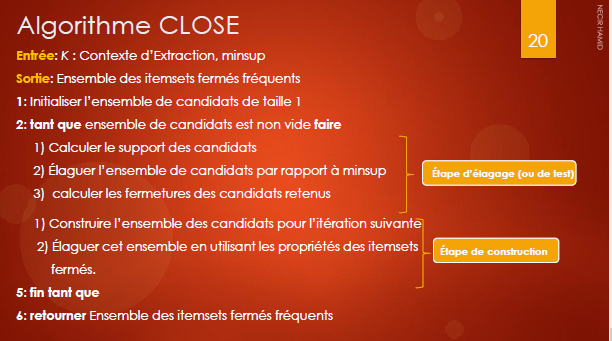

#Les règles d'association :  

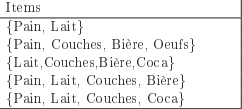

Ce tableau donne une illustration de ce type de données. Tel que chaque rang correspond à une transation.

{Pain} ==> {Lait}
cette règle suggère qu'il existe une relation forte entre la vente de pain et du lait parce que plusieurs clients qui achètent du pain achètent aussi du lait.

#La représentation Binaire :   
Les données du panier telles de celles présentées dans le tableau précédent, peuvent facilement se mettre sous cette forme bianire.
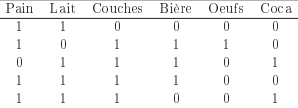

cette phase de binarisation est importante afin d'executer l'algorithme.




#Implémentation :

*Nous allons utilisé la base de données "STORE DATA" qui représente l'historique des transactions d'un magasin*

**Lien** : https://drive.google.com/file/d/bc1qr8qp3yvj5t46tx2c0h3rt2g2jzunwafr2h6wwf/view?fbclid=IwAR2GbsIf-Hp_VE5s4nrfMJp18AEmeM2talEEUrS6WhPDKhWoDzj8c-cXJwI

**Lien de la base de données modifiée**: https://drive.google.com/file/d/10sg--VtE21ho5s-K8XzOdIkJTPb4A7p7/view?usp=sharing

**Store Data en chiffres :**

7501 transactions(lignes)

119 produits(colonnes)

##Importation des données

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from collections import deque
import time

In [ ]:
#dataset = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/FD/store_data.csv",delimiter=',', header=None)
dataset = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/FD/bdd1.csv",delimiter=',', header=None)

#Phase de prétraitement

##Construction de la matrice de transaction (Binaire)

In [ ]:
#CONSTRUCTION DE LA LISTES DES PRODUITS
transactions = dataset.values.tolist()

lignes = np.array(transactions)
t = np.unique(np.array(transactions))
Produits = [x for x in t if x != 'nan']
Produits = np.array(Produits)

#CONSTRUCTION DE LA MATRICES DE TRANSACTIONS
#mat_transactions = np.zeros((7501,119),dtype=np.int64)
mat_transactions = np.zeros((lignes.shape[0],Produits.shape[0]),dtype=np.int64)

for i in range(lignes.shape[0]):
    for j in range(lignes.shape[1]):
        produit = lignes[i][j]
        for k in range(Produits.shape[0]):
            if(produit == Produits[k]):
                mat_transactions[i][k]=1

In [ ]:
BDD = pd.DataFrame(mat_transactions,columns=Produits)
print("La matrice de transaction:")
BDD

La matrice de transaction:


,almonds,antioxydant juice,avocado,black tea,body spray,brownies,bug spray,burgers,cake,cereals,...,tomato sauce,tomatoes,toothpaste,turkey,vegetables mix,white wine,whole weat flour,whole wheat pasta,whole wheat rice,yams
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,0,1
1,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
96,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
97,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
98,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


**Interpretation de la dataset**


In [ ]:
print("Le nombre de transaction = ",mat_transactions.shape[0]," et le nombre de produits = ",mat_transactions.shape[1])

Le nombre de transaction =  100  et le nombre de produits =  76


#Construction des 1-itemsets

In [ ]:
#fonction qui calcul le produit entre deux vecteurs
def produit(A,B):
    c=np.zeros_like(A)
    for i in range(A.shape[0]):
        c[i]=A[i]*B[i]
    return c

#fonction qui calcul la fermeture des 1-itemsets
def Fermeture(mat_transactions,Produits,p):
    f=[]
    f.append(Produits[p])
    pp = mat_transactions[:,p]
    for i in range(mat_transactions.shape[1]):
        if(i != p):
            c = produit(mat_transactions[:,p],mat_transactions[:,i])
            kifkif=True
            for j in range(pp.shape[0]):
                if(pp[j] != c[j]):
                    kifkif=False
            if(kifkif == True):
                f.append(Produits[i])
                #print(Produits[i])

    f = np.array(f, dtype = object)
    return f

#fonction qui calcul le support des 1-itemsets
def support(mat):
    sup = 0
    liste_sup = []
    for j in range(mat.shape[1]):
        for i in range(mat.shape[0]):
            if mat[i,j] == 1:
                sup = sup + 1
        #print("produit ",j," a un supp de = ",sup)
        liste_sup.append(sup/mat.shape[0])
        sup=0
    return np.array(liste_sup)

#fonction qui renvoie juste les items fréquents
def Frequent(Liste_sup, Prod,Minsup):
    freq = False
    freq_liste = []
    index = 0
    for i in range(Liste_sup.shape[0]):
        if Liste_sup[i] > Minsup:
            freq = True
            index = i
            freq_liste.append(np.array([index,Liste_sup[i]], dtype=object))
        else:
            freq = False
    return np.array(freq_liste)


def Apriori_Close_itemseet_1(dataset, Produits,Minsup):
    print("Debut de l'execution de l'algorithme apriori close pour les 1-itemsets ...")
    # Creation de la matrice des trasaction
    transactions = dataset.values.tolist()
    lignes = np.array(transactions)
    t = np.unique(np.array(transactions))
    #Produits=t[0:][:]
    Produits = [x for x in t if x != 'nan']
    Produits = np.array(Produits)
    #print("Lignes ",lignes.shape[0]," prod ",Produits.shape[0])
    #CONSTRUCTION DE LA MATRICES DE TRANSACTIONS
    mat_transactions = np.zeros((lignes.shape[0],Produits.shape[0]),dtype=np.int64)
    for i in range(lignes.shape[0]):
        for j in range(lignes.shape[1]):
            produit = lignes[i][j]
            for k in range(Produits.shape[0]):
                if(produit == Produits[k]):
                    mat_transactions[i][k]=1


    # CONSTRUCTION DE LA LISTE DES SUPPORT
    Liste_support = support(mat_transactions)
    #print("Liste support ",Liste_support)
    # CONSTRUCTION DE LA LISTE DES ITEMS FREQUENTS
    frequent = Frequent(Liste_support,Produits, Minsup)
    #print("Liste des frequents est ",frequent)
    mat=[]
    for i in range(frequent.shape[0]):
        mat.append([ np.array(Produits[frequent[i][0]]),frequent[i][1],np.array(Fermeture(mat_transactions,Produits,frequent[i][0]))])
    print("Fin de l'execution apriori close pour les 1-itemset")
    return np.array(mat, dtype=object)


#fonction qui va orienter l'utilisateur a choisir le bon minsup
def FixerMinSup(mat_transactions):
  Liste_support = support(mat_transactions)
  #print(Liste_support)
  min=np.min(Liste_support)
  max=np.max(Liste_support)
  print("Veuillez choisir un MinSup qui appartient au domaine suivant : [ ",min,"% ; ",max,"% ]")
  return min,max


In [ ]:
FixerMinSup(mat_transactions)

Veuillez choisir un MinSup qui appartient au domaine suivant : [  0.01 % ;  0.98 % ]


(0.01, 0.98)

In [ ]:
minsup = 0.02
itemset1 = Apriori_Close_itemseet_1(dataset,Produits,minsup)


Debut de l'execution de l'algorithme apriori close pour les 1-itemsets ...
Fin de l'execution apriori close pour les 1-itemset


In [ ]:
print("Le nombre des 1-itemset : ",len(itemset1))

Le nombre des 1-itemset :  50


In [ ]:
GEN_1 = pd.DataFrame(itemset1,columns=['1-Itemset','Support','Fermeture'])
GEN_1

,1-Itemset,Support,Fermeture
0,avocado,0.11,"[avocado, eggs]"
1,black tea,0.08,"[black tea, eggs]"
2,body spray,0.05,"[body spray, eggs, green tea, pancakes]"
3,burgers,0.09,"[burgers, eggs]"
4,cereals,0.03,"[cereals, chicken, clothes accessories, eggs, ..."
5,champagne,0.04,[champagne]
6,chicken,0.13,"[chicken, eggs]"
7,chocolate,0.14,[chocolate]
8,clothes accessories,0.03,"[clothes accessories, cereals, chicken, eggs, ..."
9,cookies,0.03,"[cookies, eggs]"


#Construction des K-itemsets

Afin de construire les K-itemset suivant:
nous devons construire la matrice du Kémé Générateur a chaque fois, cette dernière va contenire les itemset fréquents.

L'idée pou calculer le support d'un k-itemset est la suivante:

Dans l'exemple suivant nous allons calculé le support de {pain , lait , jus} cad K = 3

1-Sommer les colonnes des k produits et obtenir un vecteur.

2-compter le nombre d'apparition du "k" dans le vecteur, le resultat est le support.

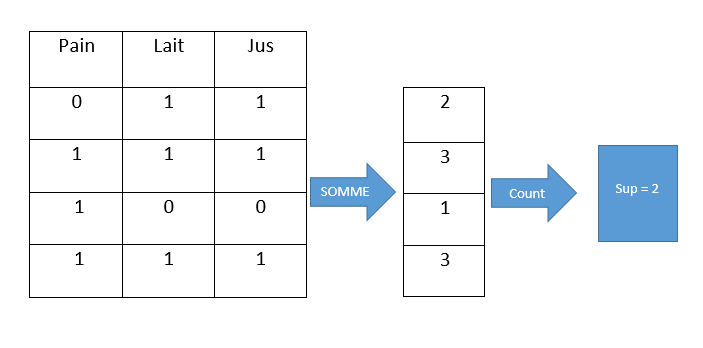

De meme pour la fermeture:

l'idée est:

1 - faire la somme des colonnes des k-itemset

2 - parcourir la liste des autres itemset et faire la comparaison de tel sorte que:

si la valeure dans le vecteur somme = k , la valeur dans la colonne de l'item = 1.

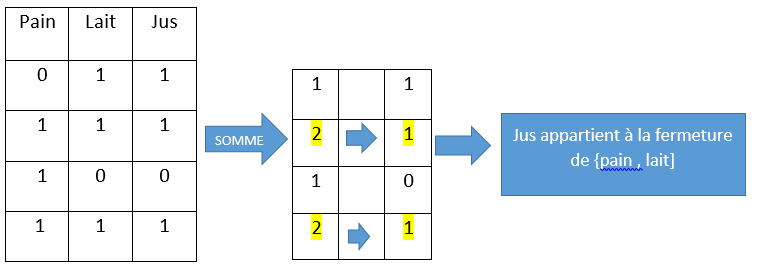




#IMPLEMENTATION

In [ ]:
#fonction qui renvoie l'indice d'un produit
def shearch_col_prod(l,Produits):
  pos = []
  for i in l:
    pos.append(np.where(Produits == i)[0][0])
  return np.array(pos)

#fonction qui calcul le support d'un K-itemset
def SUPPORT_kitemset(fermeture,Produit,mat_transactions, i,k = 2):
  count = 0
  position = []
  temp = np.zeros((mat_transactions.shape[0],1))
  index = 0
  position=shearch_col_prod(fermeture[i],Produits)
  #print(position)
  #temp = []
  taille = len(position)
  for pos in position:

    #print("pos = ",pos)
    for w in range(mat_transactions.shape[0]):
      temp[w] = temp[w] + mat_transactions[:,pos][w]
  #print(temp)
  for j in range(temp.shape[0]):
    #print(temp[j])
    if temp[j] == k:
      count = count +1
  return count / mat_transactions.shape[0]

#fonction qui calcul la fermeture d'un K-itemset
def Fermeture_item(matrice_transaction,matircie_itemset_freq,Produit,ind,k):
  array_ferm = []
  temp = np.zeros((matrice_transaction.shape[0],1))

  l = matircie_itemset_freq[ind][0].tolist()

  indices = shearch_col_prod(l, Produit)
  for index in indices:
    for w in range(matrice_transaction.shape[0]):
      temp[w] = temp[w] + matrice_transaction[:,index][w]
  #print(temp)
  #print(temp[0][0])
  for j in range(0,matrice_transaction.shape[1]):
    fr = []
    vrai = True
    for f in range(0,matrice_transaction.shape[0]):
      if temp[f][0] == k:
        #print("k ",k)
        #print("temp ",temp[f][0] )
        #print(" mat2 ",matrice_transaction[f][j])
        if matrice_transaction[f][j] != 1:
          vrai = False
    if vrai == True:

      array_ferm.append([Produit[j]])


  return array_ferm


#Fonction pour former la matrice du Kéme-itemset
def Fermeture_item(matrice_transaction,matircie_itemset_freq,Produit,ind,k):
  array_ferm = []
  temp = np.zeros((matrice_transaction.shape[0],1))

  l = matircie_itemset_freq[ind][0].tolist()

  indices = shearch_col_prod(l, Produit)
  for index in indices:
    for w in range(matrice_transaction.shape[0]):
      temp[w] = temp[w] + matrice_transaction[:,index][w]
  #print(temp)
  #print(temp[0][0])
  for j in range(0,matrice_transaction.shape[1]):
    fr = []
    vrai = True
    for f in range(0,matrice_transaction.shape[0]):
      if temp[f][0] == k:
        #print("k ",k)
        #print("temp ",temp[f][0] )
        #print(" mat2 ",matrice_transaction[f][j])
        if matrice_transaction[f][j] != 1:
          vrai = False
    if vrai == True:
      #print("vraiiii ", j ," kkkk",Produit[j])
      array_ferm.append([Produit[j]])


  return array_ferm

In [ ]:
def possbile(A,B,k):
    #print("deb possible")
    if(k == 1):
      #print("k=1")
      return True
    else:
      #print("k!=1")
      for i in range(0,k-1):
        if(A[i] != B[i]):
          return False
      return True



def checkfermeture(AF,BF):
    #print("debut checkfermeture \n")
    l1 = len(AF)
    l2 = len(BF)
    count = 0
    if(l1 < l2):

        for i in range(l1):
            #print("A",AF[i])
            for j in range(l2):
                #print("B", BF[j])
                if(AF[i] == BF[j]):
                    #print("oui")
                    count = count+1
        #print("count = ",count)
        if(count == l1):
            #print("fermeture impossible")
            return False
        else:
            #print("fermeture possible")
            return True
    else:
        for i in range(l2):
            #print("B",BF[i])
            for j in range(l1):
                #print("A", AF[j])
                if(BF[i] == AF[j]):
                    #print("oui")
                    count = count+1
        #print("count = ",count)
        if(count == l2):
            #print("fermeture impossible")
            return False
        else:
            #print("fermeture possible")
            return True


#print(checkfermeture(AF,BF))
def combiner(A,B,k):
    #print("debut combiner")
    Al=A.tolist()
    Bl=B.tolist()
    V=[]
    if(k == 1):
      Cl=[]
      Cl.append(Al)
      Cl.append(Bl)
      #print("cl1 ",Cl)
      return np.array(Cl)

    else:
      Cl = Al
      for i in range(0,k-1):
        elem = Bl.pop(0)
        #print("elem ",elem)
    #print(Bl)
      Bll = deque(Bl)
    #print("bll ",Bll)
      for i in range(len(Bll)):
        elem = Bll.popleft()
        Cl.append(elem)
    #print("cl ",Cl)
      return np.array(Cl)


In [ ]:
def FormationGen(gen2,k):
  L=[]
  for i in range(0,gen2.shape[0]-1):
    #print("i = ",i)
    A = gen2[i][0]
    #print("a",A)
    AF = gen2[i][2]
    for j in range(i+1,gen2.shape[0]):
      B = gen2[j][0]
      #print("b",B)
      BF = gen2[j][2]

      p = possbile(A,B,k-1)
    #print("possible = ",p)

#si c'est possible alors on va verifier les fermetures

      if(p==True):
        f=checkfermeture(AF, BF)

      #Si c'est possible alors on combine
        if(f==True):

          itemk=combiner(A, B, k-1)
          #print("Le nouveau item = ",itemk)
          L.append(itemk)
  return np.array(L)

def FormationMatK_itemset(itemset,k):
  item = []
  for i in range(itemset.shape[0]):
    item.append([itemset[i],SUPPORT_kitemset(itemset,Produits,mat_transactions,i,k),itemset[i]])
  return np.array(item)

def Frequent_Kitemset(matrice_support,Minsup):
  # Tableau vide comme matrice des support
  array_frequent = []
  for i in range(matrice_support.shape[0]):
    if matrice_support[i,1] > Minsup:
      array_frequent.append(matrice_support[i])
  return np.array(array_frequent)

def FormerItem(mat_itemfreq,itemset2,Produits,mat_transactions,k):
  k_item = []
  for i in range(mat_itemfreq.shape[0]):
    support = SUPPORT_kitemset(itemset2,Produits,mat_transactions, i,k )
    f = np.array(Fermeture_item(mat_transactions,mat_itemfreq,Produits,i,k))
    fermeture = np.array(f[:,0])
    k_item.append([np.array(mat_itemfreq[i,0].tolist()) , support ,  fermeture])
  return np.array(k_item)

#Avec La récursivité

In [ ]:
def CLOSE(itemset_k,L,k,minsup):
  print("Debut Close pour les k-itemsets \n")
  #print("K = ",k)
  L.append([k-1,itemset_k])
  if(len(itemset_k)==0 ):
    print("Fin Close \n")
    print(L)
  else:
    print("==================",k)
    itemset_kk=FormationGen(itemset_k,k)
    ik = FormationMatK_itemset(itemset_kk,k)
    Freqitemk = Frequent_Kitemset(ik,minsup)
    genk=FormerItem(Freqitemk,itemset_kk,Produits,mat_transactions,k)
    print("================================== ",k,"-itemset ==================================")
    #print(genk)
    print(genk.shape)

    CLOSE(genk,L,k+1,minsup)
    return L

#Sans la récursivité

In [ ]:
def CLOSE1(itemset_k,k,minsup):
  L=[]
  print("Debut Close pour les k-itemset \n")

  while(len(itemset_k) != 0):
    L.append([k-1,itemset_k])
    #print("L = ",L)
    print("==================",k)
    itemset_kk=FormationGen(itemset_k,k)
    ik = FormationMatK_itemset(itemset_kk,k)
    Freqitemk = Frequent_Kitemset(ik,minsup)
    genk=FormerItem(Freqitemk,itemset_kk,Produits,mat_transactions,k)
    print("genk ",len(genk))
    itemset_k=genk
    print("=============================fin===== ",k,"-itemset ==================================")
    k=k+1
  print("FIN CLOSE")
  return L


In [ ]:
def Association(itemss,minsup):
  nb=0
  for i in range(itemss.shape[0]):
    lf = []
    if(itemss[i][1]>=minsup):
      for j in range(itemss[i][2].shape[0]):
        exist= False
        for k in range(itemss[i][0].shape[0]):
          if(itemss[i][0][k] == itemss[i][2][j]):
            exist = True
        if(exist == False):
          lf.append([itemss[i][2][j]])

      lfarr =  np.array(lf)
      if(len(lfarr)!=0):
        print(itemss[i][0], " ==>  ",lfarr)
        nb=nb+1
        print("\n\n")
  return nb
def Association1(itemset1,minsup):
  nb=0
  for i in range(itemset1.shape[0]):
    lf = []
    if(itemset1[i][1]>=minsup):
      for j in range(itemset1[i][2].shape[0]):
        if(itemset1[i][0] != itemset1[i][2][j]):
          lf.append([itemset1[i][2][j]])
      lfarr =  np.array(lf)
      if(len(lfarr)!=0):
        print(itemset1[i][0], " ==>  ",lfarr)
        nb=nb+1
        print("\n\n")
  return nb

##ALGORITHME CLOSE


In [ ]:
def ALGO_CLOSE(dataset,Produits):
  min,max=FixerMinSup(mat_transactions)
  print("\n==========================================================================================================\n")
  minsup = float(input("Veuillez introduire le MinSup ?  "))
  while(minsup<min or minsup>max):
    minsup = float(input("Veuillez introduire le bon MinSup !  "))
  print("Votre MinSup = ",minsup)
  print("\n==========================================================================================================\n")
  tps1 = time.clock()
  itemset1 = Apriori_Close_itemseet_1(dataset,Produits,minsup)
  c= CLOSE1(itemset1,2,minsup)
  #Avec la recusivité
  #L=[]
  #c=CLOSE(itemset1,L,2,minsup)
  pl = np.array(c)
  print("\n==========================================================================================================\n")
  print("Les régles d'associations : \n")
  nbregles=Association1(itemset1,minsup)
  print("++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++")
  for i in range(1,pl.shape[0]):
    itemss = pl[i][1]
    nbk=Association(itemss,minsup)
    nbregles = nbregles+nbk
    print("++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++")
  tps2 = time.clock()
  print("Le nombre total des règles d'associations générées par l'algorithme = ",nbregles)
  print("Le temps d'execution = ", tps2 - tps1," seconds")





In [ ]:
ALGO_CLOSE(dataset,Produits)

Veuillez choisir un MinSup qui appartient au domaine suivant : [  0.01 % ;  0.98 % ]


Veuillez introduire le MinSup ?  0.02
Votre MinSup =  0.02


Debut de l'execution de l'algorithme apriori close pour les 1-itemsets ...


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead
  if __name__ == '__main__':


Fin de l'execution apriori close pour les 1-itemset
Debut Close pour les k-itemset 

================== 2


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:33: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.


genk  75
=============================fin=====  2 -itemset ==================================
================== 3
genk  4
=============================fin=====  3 -itemset ==================================
================== 4
genk  0
=============================fin=====  4 -itemset ==================================
FIN CLOSE


Les régles d'associations : 

avocado  ==>   [['eggs']]



black tea  ==>   [['eggs']]



body spray  ==>   [['eggs']
 ['green tea']
 ['pancakes']]



burgers  ==>   [['eggs']]



cereals  ==>   [['chicken']
 ['clothes accessories']
 ['eggs']
 ['mineral water']]



chicken  ==>   [['eggs']]



clothes accessories  ==>   [['cereals']
 ['chicken']
 ['eggs']
 ['mineral water']]



cookies  ==>   [['eggs']]



cooking oil  ==>   [['eggs']]



cottage cheese  ==>   [['eggs']
 ['mineral water']]



energy bar  ==>   [['eggs']]



escalope  ==>   [['eggs']]



extra dark chocolate  ==>   [['black tea']
 ['chicken']
 ['eggs']
 ['fresh tuna']
 ['mineral water']
 ['sa

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:50: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  from ipykernel import kernelapp as app
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: DeprecationWarning: time.clock has been deprecated in Python 3.3 and will be removed from Python 3.8: use time.perf_counter or time.process_time instead


##Interpretation des résultats


In [ ]:
tabminsup = np.array([0.02,0.03,0.05,0.08,0.1,0.2,0.5])
tabtemps = np.array([1.742,1.312,0.4,0.223,0.213,0.09,0.06])
nbregles= np.array([59,46,20,10,8,2,0])

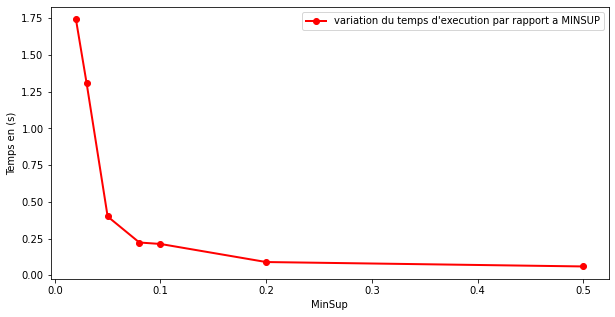

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(tabminsup,tabtemps,"o-",label="variation du temps d'execution par rapport a MINSUP",c='r',linewidth=2)
plt.xlabel("MinSup")
plt.ylabel("Temps en (s)")
plt.legend()
plt.show()

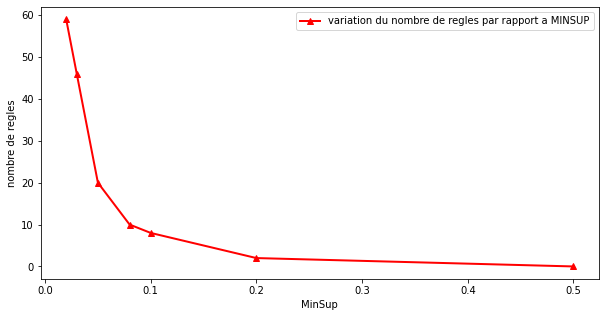

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(tabminsup,nbregles,"o-",label="variation du nombre de regles par rapport a MINSUP",c='r',linewidth=2,marker='^')
plt.xlabel("MinSup")
plt.ylabel("nombre de regles")
plt.legend()
plt.show()

Nous avons constaté que le temps d'exécution et le nombre de règles générées se comporte d'une manière contraire au choix de la variable minsup.


Ce qui est totalement logique :


Plus le **min sup** est *grand*...

Plus le **nombre d’itemset fréquents** *diminue*...

Ainsi, le **nombre de règles** aussi *diminue*...

Ce qui engendre un **temps d’exécution** plus *petit*...
  
